In [28]:
import numpy as np
import tensorflow as tf
import pandas as pd
from keras import layers, models

In [29]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

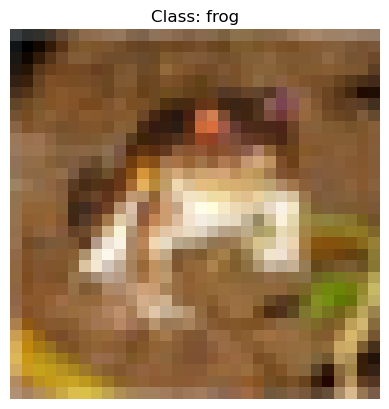

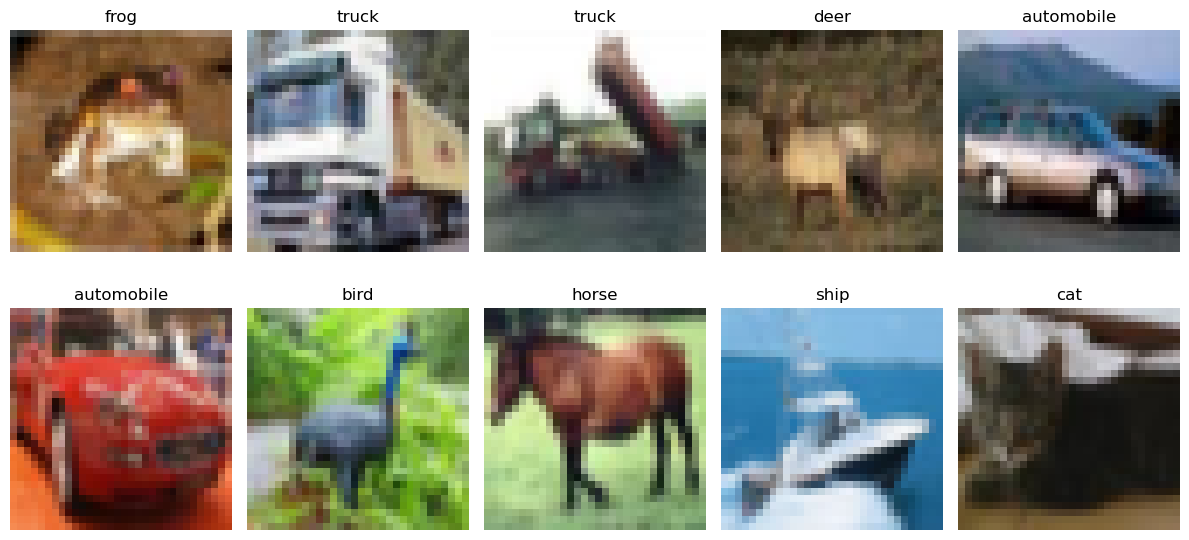

In [30]:
import matplotlib.pyplot as plt
import numpy as np

def plot_cifar_image(image, title=None):
    """
    Plots a CIFAR-10 image.
    Parameters:
    image (numpy.ndarray): The image to plot, expected to be a 3D array
    with shape (32, 32, 3) for RGB channels.
    title (str): Optional title for the plot.
    """
    plt.imshow(image)
    plt.axis('off')
    if title:
        plt.title(title)
    plt.show()

def plot_multiple_cifar_images(images, labels=None, class_names=None, rows=2, cols=5):
    """
    Plot multiple CIFAR-10 images in a grid.
    Parameters:
    images: Array of images with shape (n, 32, 32, 3)
    labels: Optional labels for each image
    class_names: Optional list of class names
    rows, cols: Grid dimensions
    """
    fig, axes = plt.subplots(rows, cols, figsize=(12, 6))
    axes = axes.ravel()
    
    for i in range(min(len(images), rows * cols)):
        # Ensure pixel values are in [0, 1] range
        img = images[i]
        if img.max() > 1.0:
            img = img / 255.0
        
        axes[i].imshow(img)
        axes[i].axis('off')
        
        # Add title with class name if available
        if labels is not None:
            if class_names is not None:
                title = f"{class_names[labels[i]]}"
            else:
                title = f"Class: {labels[i]}"
            axes[i].set_title(title)
    
    # Hide unused subplots
    for i in range(len(images), len(axes)):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

# CIFAR-10 class names
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
                   'dog', 'frog', 'horse', 'ship', 'truck']

# Example usage:
# Plot a single image
plot_cifar_image(x_train[0], title=f"Class: {cifar10_classes[y_train[0][0]]}")

# Plot multiple images
plot_multiple_cifar_images(x_train[:10], y_train[:10].flatten(), cifar10_classes)

In [31]:
def analyze_training_history(history):
    """
    Analyze and visualize training vs validation loss/accuracy
    """
    # Convert history to DataFrame
    df = pd.DataFrame(history.history)
    
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot Loss
    ax1.plot(df['loss'], label='Training Loss', linewidth=2)
    ax1.plot(df['val_loss'], label='Validation Loss', linewidth=2)
    ax1.set_title('Model Loss Over Time')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True)
    
    # Plot Accuracy
    ax2.plot(df['accuracy'], label='Training Accuracy', linewidth=2)
    ax2.plot(df['val_accuracy'], label='Validation Accuracy', linewidth=2)
    ax2.set_title('Model Accuracy Over Time')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Print analysis
    print("📊 TRAINING ANALYSIS")
    print("=" * 50)
    
    final_train_loss = df['loss'].iloc[-1]
    final_val_loss = df['val_loss'].iloc[-1]
    final_train_acc = df['accuracy'].iloc[-1]
    final_val_acc = df['val_accuracy'].iloc[-1]
    
    print(f"Final Training Loss: {final_train_loss:.4f}")
    print(f"Final Validation Loss: {final_val_loss:.4f}")
    print(f"Final Training Accuracy: {final_train_acc:.4f}")
    print(f"Final Validation Accuracy: {final_val_acc:.4f}")
    
    # Detect overfitting
    loss_gap = final_val_loss - final_train_loss
    acc_gap = final_train_acc - final_val_acc
    
    print(f"\n🔍 OVERFITTING INDICATORS:")
    print(f"Loss Gap (val - train): {loss_gap:.4f}")
    print(f"Accuracy Gap (train - val): {acc_gap:.4f}")
    
    if loss_gap > 0.3 or acc_gap > 0.1:
        print("🚨 OVERFITTING DETECTED!")
        print("   - Validation loss higher than training loss")
        print("   - Model may be memorizing training data")
        print("   - Consider: early stopping, dropout, regularization")
    elif abs(loss_gap) < 0.1 and abs(acc_gap) < 0.05:
        print("✅ GOOD GENERALIZATION!")
        print("   - Training and validation metrics are close")
        print("   - Model generalizing well to unseen data")
    else:
        print("⚠️ MODERATE OVERFITTING")
        print("   - Some gap between train/validation metrics")
        print("   - Monitor performance on test set")
    
    # Find best epoch (lowest validation loss)
    best_epoch = df['val_loss'].idxmin() + 1
    best_val_loss = df['val_loss'].min()
    print(f"\n🎯 Best Model at Epoch {best_epoch} (val_loss: {best_val_loss:.4f})")
    
    return df

In [32]:
def create_model():
    """
    Create a simple CNN model for CIFAR-10 classification
    """
    # Functional API version
    input_layer = layers.Input(shape=(32, 32, 3))
    x = layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')(input_layer)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dense(64, activation='relu')(x)
    output_layer = layers.Dense(10, activation='softmax')(x)

    model = models.Model(input_layer, output_layer)

    return model

def create_model_with_batch_normalization():
    """
    Create a simple CNN model for CIFAR-10 classification
    """
    # Functional API version
    input_layer = layers.Input(shape=(32, 32, 3))
    x = layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')(input_layer)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    output_layer = layers.Dense(10, activation='softmax')(x)

    model = models.Model(input_layer, output_layer)

    return model

def create_model_with_dropout():
    """
    Create a simple CNN model for CIFAR-10 classification with Dropout
    """
    # Functional API version
    input_layer = layers.Input(shape=(32, 32, 3))
    x = layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')(input_layer)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dense(64, activation='relu')(x)
    output_layer = layers.Dense(10, activation='softmax')(x)

    model = models.Model(input_layer, output_layer)

    return model

In [33]:
model = create_model_with_batch_normalization()

model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_split=0.1, epochs=10, batch_size=32, verbose=0)

In [41]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.7253 - loss: 0.9913


[0.996637225151062, 0.7278000116348267]

In [46]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │       262,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 972,320 (3.71 MB)

 Trainable params: 323,914 (1.24 MB)

 Non-trainable params: 576 (2.25 KB)

 Optimizer params: 647,830 (2.47 MB)

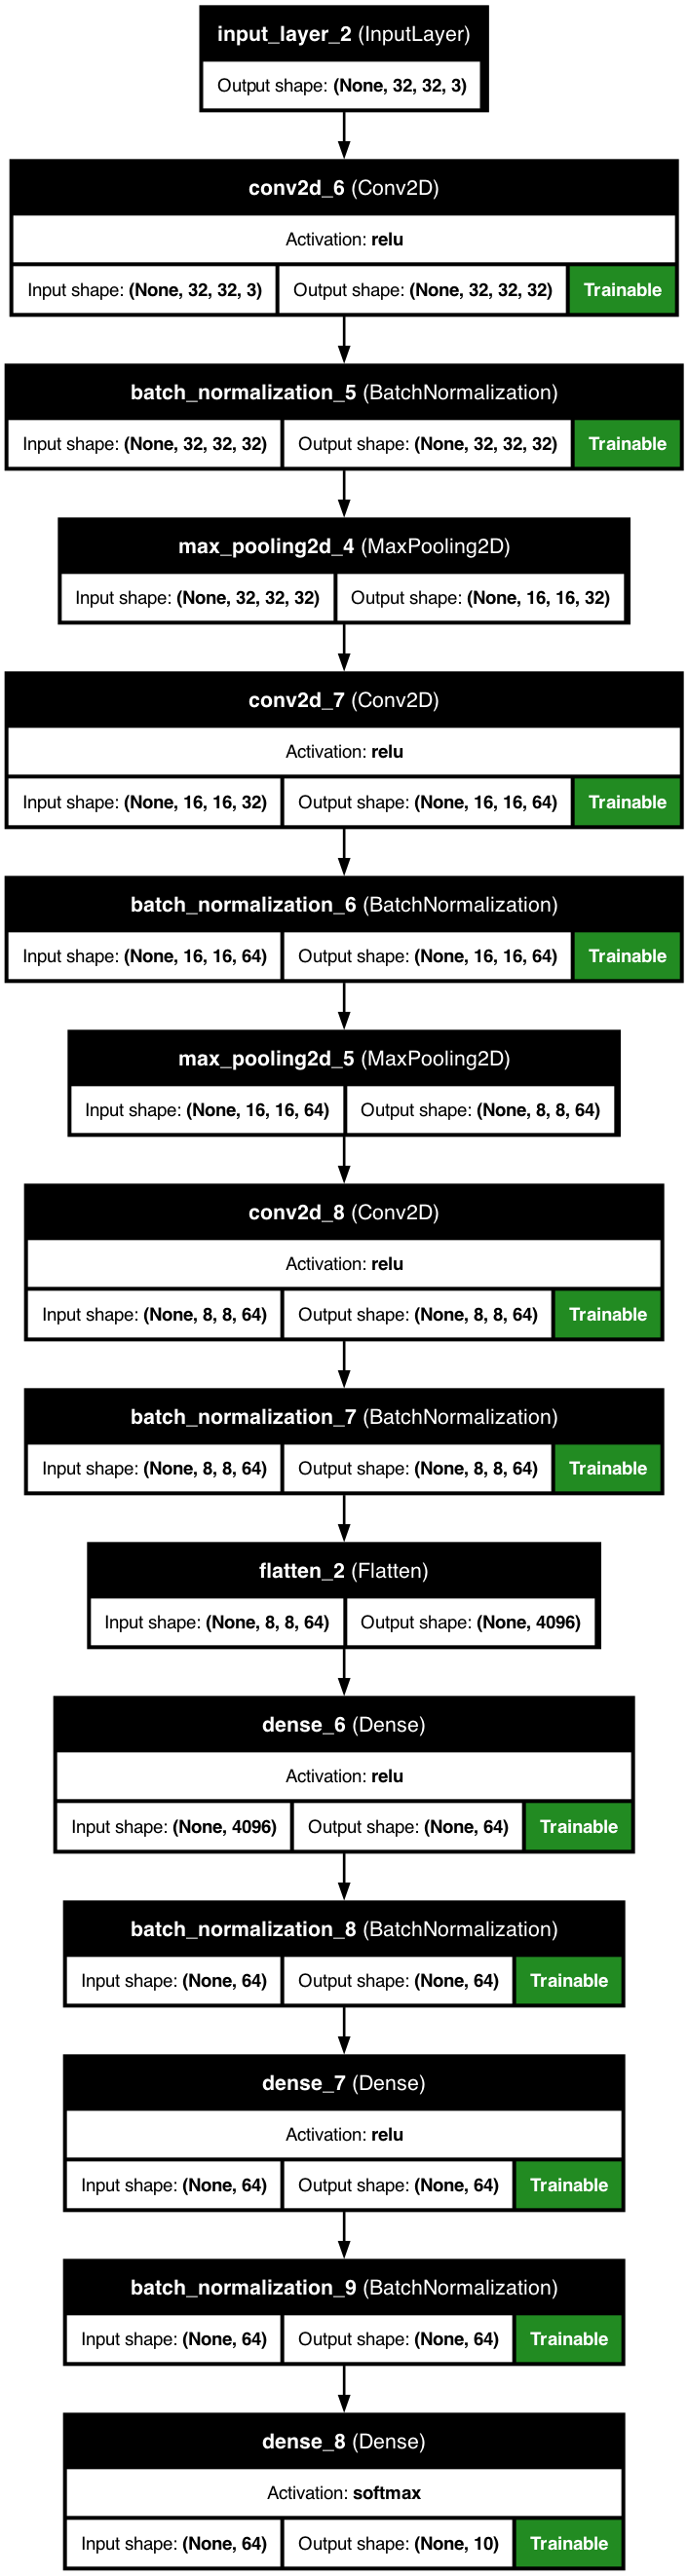

In [53]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, show_layer_activations=True, dpi=96, show_trainable=True, expand_nested=True)